In [26]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

## Table of contents
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)

## Imports

In [27]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>


In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

The first thing I see from the dataset is repayments statuses and amount of bills for previous months, this leads me to believe that the predictive model will be using data from previous months to make a prediction to the next. Similarly, there are other features like education and marriage that would perhaps imply the likelihood of payment. 

In [28]:
default_df = pd.read_csv('data/UCI_Credit_Card.csv')

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [29]:
train_df, test_df = train_test_split(default_df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

In [30]:
train_df['EDUCATION'].value_counts()

2    9815
1    7433
3    3416
5     210
4      81
6      35
0      10
Name: EDUCATION, dtype: int64

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

Through the description of the data we see that there are some inconsistencies with the kaggle site. For instance, the Marriage feature has a min of 0, which through the website is not something that is defined by any category. Similary, we have a -2 for PAY_X which is not defined within a category. There are 10 categorical features, some being ordinal and binary; the rest being numeric. Many of our ordinal features are already in a numeric ordering. Similarly, our target feature is binary, which makes this a classification problem. ID is not a relevant feature for our model to know. Sex may be a feature that useful in the prediction, however, it does raise some ethical concerns. Thus, we drop ID and Sex. 

In [31]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [32]:
train_df.sort_index()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                  

- Above, we have see that no imputation is necessary. At the very least the NAN values are filled with a placeholder numeric. 

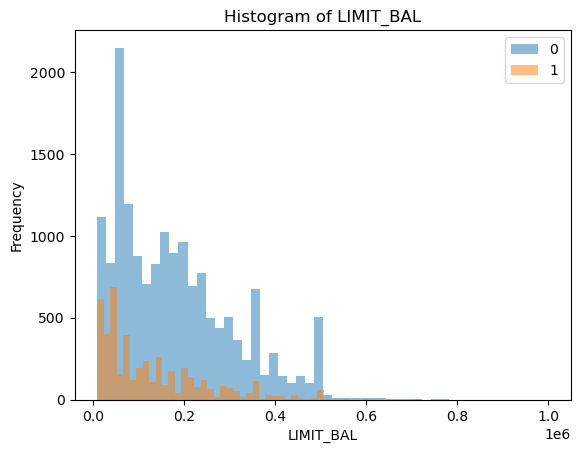

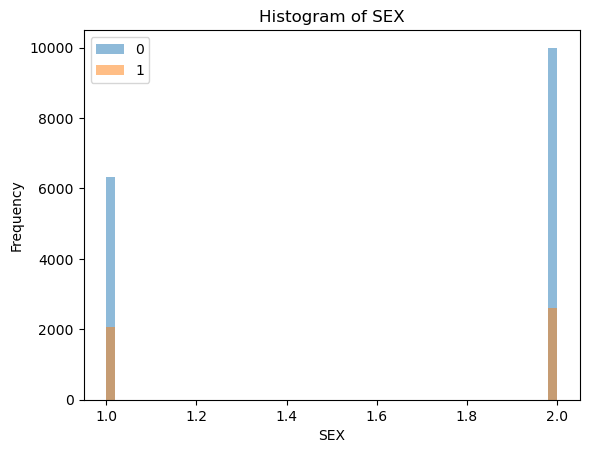

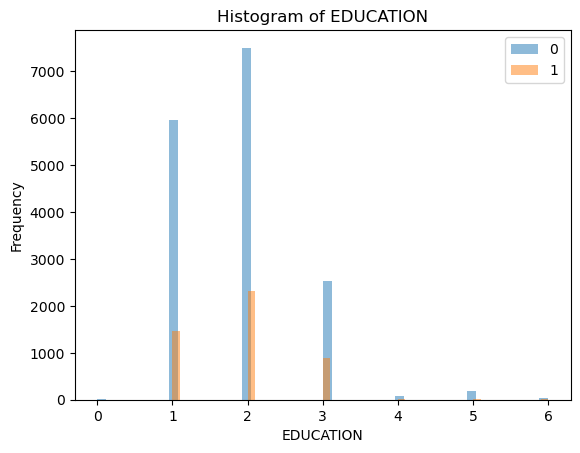

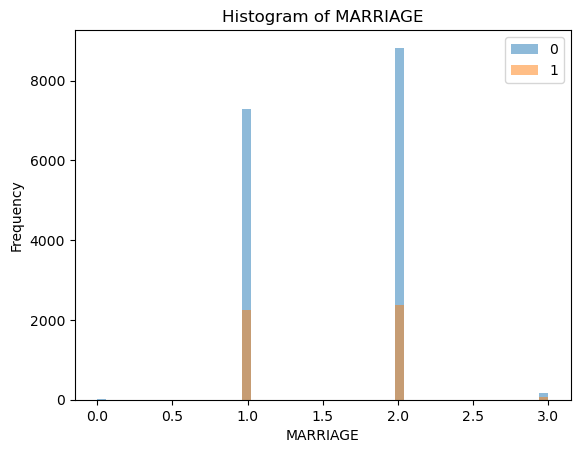

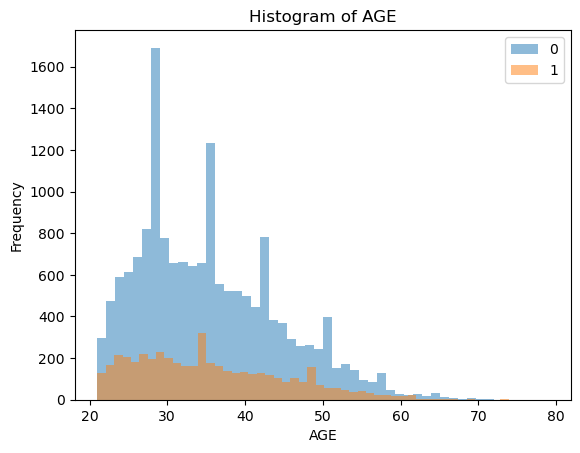

In [34]:
featureArray = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"]
for i in range(0, 5): 
    ax = train_df.groupby("default.payment.next.month")[featureArray[i]].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(featureArray[i])
    plt.title("Histogram of " + featureArray[i])
    plt.show()

- Above we have the histograms of classes for the more "descriptive" features. This EDA is mainly to visualize whether there is any one feature that divides the classes. 

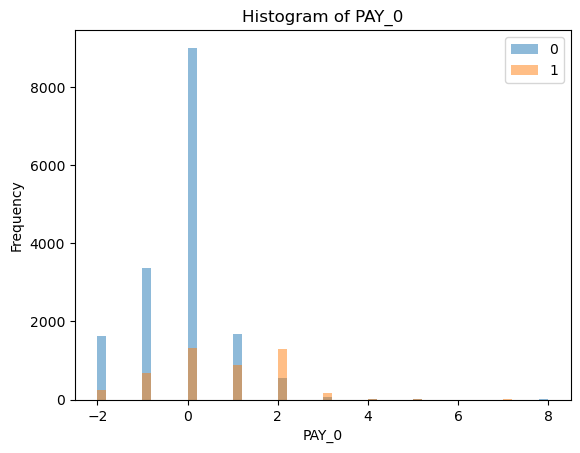

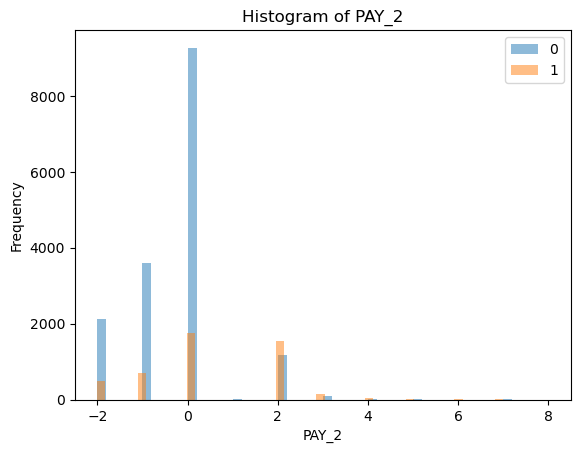

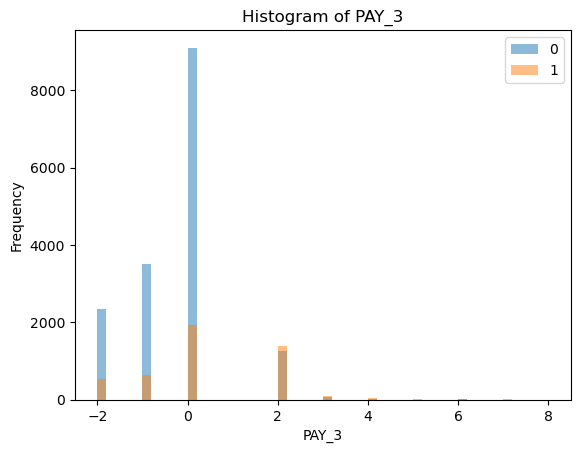

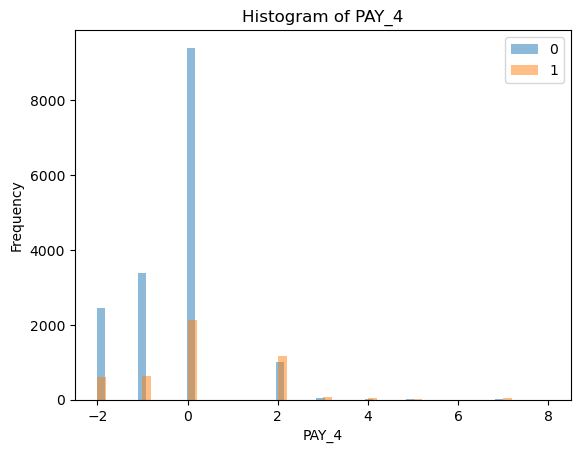

In [35]:
featureArray = ["PAY_0", "PAY_2", "PAY_3", "PAY_4"]
for i in range(0, 4): 
    ax = train_df.groupby("default.payment.next.month")[featureArray[i]].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(featureArray[i])
    plt.title("Histogram of " + featureArray[i])
    plt.show()

- Above we have the histograms of features of PAY. This EDA is mainly to visualize whether there is any one feature that divides the classes. 

### Check Class imbalance
- There seems to be a class imbalance towards 0, at about 77% of the data. We may interpret this as 0 being more likely than 1.


In [87]:
train_df["default.payment.next.month"].value_counts(normalize=True)

0    0.776762
1    0.223238
Name: default.payment.next.month, dtype: float64

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>


1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

- Numeric features include: AGE, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6.

- Categorical features include: EDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6. 

- Dropped features: SEX, ID. 

In [38]:
#Define the feature vectors: 

numeric_features = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
categorical_features = ['MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pass_through = ['EDUCATION']
dropped_features = ['SEX', 'ID']


In [39]:
preprocessor = make_column_transformer(  
                        (StandardScaler(), numeric_features), 
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features), 
                         ("drop", dropped_features),
                         ("passthrough", pass_through),
)
#print(preprocessor) #Let us view the column transformer

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>

1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [40]:
dummy = DummyClassifier(strategy="prior")

In [41]:
X_train = train_df.drop(columns=["default.payment.next.month"])
X_test = test_df.drop(columns=["default.payment.next.month"])
y_train = train_df['default.payment.next.month']
y_test = test_df['default.payment.next.month']
#Test the preprocessor: 
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
column_names = numeric_features + list(
    preprocessor.named_transformers_["onehotencoder"].get_feature_names_out(
        categorical_features
    )
) + pass_through
print(column_names)
df = pd.DataFrame(X_train_transformed, index=X_train.index, columns=column_names)
df

['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8', 'EDUCATION']


C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,EDUCATION
16395,0.054187,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,-0.039546,-0.040229,-0.234603,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21448,-0.597108,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,-0.297166,3.739796,6.785208,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20034,0.922579,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,-0.333097,-0.270403,-0.289017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
25755,-0.597108,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,-0.115517,-0.018028,-0.060260,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1438,2.008070,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,-0.333097,-0.206185,-0.223720,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,0.162736,-0.513226,-0.486648,-0.488648,-0.450259,-0.400085,-0.389539,-0.262410,-0.210772,-0.221435,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
17730,2.008070,-0.695886,-0.688067,-0.680974,-0.630868,-0.618584,-0.534120,-0.333097,-0.270403,-0.148629,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28030,-0.705657,-0.053288,-0.010446,-0.003381,-0.062716,-0.516534,-0.499414,-0.215559,-0.178663,-0.205764,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
15725,-1.574049,-0.309066,-0.288478,-0.254590,-0.195023,-0.179691,-0.372606,-0.215677,-0.178663,-0.180189,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


<!-- END QUESTION -->



In [42]:
cross_val_score(dummy, X_train, y_train)

array([0.77690476, 0.77690476, 0.77666667, 0.77666667, 0.77666667])

- Since the dummy score is not overly biased, then we will stick with accuracy as our metric. 

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>


1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

In [43]:
lr = LogisticRegression(max_iter = 1000) #The complexity hyperparameter is C
#Create the parameter grid 
param_grid = {
"logisticregression__C" : [0.001, 0.01, 0.1, 1.0, 10, 100]
}
#Create our pipeline
pipe_lr = make_pipeline(preprocessor, lr)
#We employ the use of random grid search: 
random_search = RandomizedSearchCV(
    pipe_lr, param_distributions=param_grid, n_jobs=-1, n_iter=6, cv=5, random_state=123
)
random_search.fit(X_train, y_train)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6']),
                                                                              ('onehotencoder',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['MARRIAGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6']),
                                                                              ('drop',
                                                                               'drop',
                                                                               ['SEX',
                                                                                'ID']),
                                                                              ('passthrough',
                                                                               'passthrough',
                                                                               ['EDUCATION'])])),
                                             ('logisticregression',
                                              LogisticRegression(max_iter=1000))]),
                   n_iter=6, n_jobs=-1,
                   param_distributions={'logisticregression__C': [0.001, 0.01,
                                                                  0.1, 1.0, 10,
                                                                  100]},
                   random_state=123)

In [44]:
#We get the best parameters
best_C = random_search.best_params_['logisticregression__C']

In [45]:
results_dict = {}  # dictionary to store our results for different models
#Define a function mean_std_cross_val_scores: From lecture #5
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append(("%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)


In [46]:
#New pipeline: 
pipe_lr_best = make_pipeline(preprocessor, LogisticRegression(max_iter=1000,C=best_C))
results_dict['LogisticRegression, C=best_param_'] = mean_std_cross_val_scores(pipe_lr_best, X_train, y_train, return_train_score=True)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

In [47]:
results_dict['LogisticRegression, C=best_param_']

fit_time       1.402 (+/- 0.080)
score_time     0.013 (+/- 0.004)
test_score     0.820 (+/- 0.004)
train_score    0.822 (+/- 0.001)
dtype: object

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

- SVM RBF: We see that this method took the longest of the three chosen. While the validation score and train score do not differ greatly it is likely that this model is more underfit. 

- RandomForest: This model was the next slowest on fit time. Unlike ensemble methods it did have a larger difference between the validation score and the train score, implying overfitting. It is likely that increasing the hyperparameters would show that this difference becomes constant (that is validation score doesn't decrease). 

- Decision tree: This was the quickest among the methods used so far in terms of fit time. However, it is clearly, the most overfit. 

None of the three models beat the linear regression in validation score. 

In [48]:
#SVM RBF
#Create the pipeline
pipe_svm = make_pipeline(preprocessor, SVC())
results_dict['svm'] = mean_std_cross_val_scores(pipe_svm, X_train, y_train, return_train_score=True)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

In [49]:
#Ensemble method 
from sklearn.ensemble import RandomForestClassifier
pipe_rf = make_pipeline(
    preprocessor, RandomForestClassifier(random_state=123, n_jobs=-1)
)
results_dict["Random forests"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True
)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

In [50]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123))
results_dict["Decision Tree"] = mean_std_cross_val_scores(pipe_dt, X_train, y_train, return_train_score=True)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

In [51]:
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
"LogisticRegression, C=best_param_",1.402 (+/- 0.080),0.013 (+/- 0.004),0.820 (+/- 0.004),0.822 (+/- 0.001)
svm,24.521 (+/- 1.759),4.530 (+/- 0.524),0.818 (+/- 0.005),0.822 (+/- 0.001)
Random forests,2.499 (+/- 0.139),0.176 (+/- 0.040),0.813 (+/- 0.005),0.994 (+/- 0.000)
Decision Tree,0.723 (+/- 0.149),0.019 (+/- 0.008),0.726 (+/- 0.002),0.994 (+/- 0.000)


<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>


Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

In [55]:
#Optimization on SVM
param_grid = {
    "svc__C": [0.001, 0.01, 0.1, 1.0, 10, 100], 
    "svc__gamma": [0.001, 0.01, 0.1, 1.0, 10, 100]
}

random_search_svm = RandomizedSearchCV(
    pipe_svm, param_distributions=param_grid, n_jobs=-1, n_iter=10, cv=5, random_state=123
)
random_search_svm.fit(X_train, y_train)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6']),
                                                                              ('onehotencoder',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['MARRIAGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6']),
                                                                              ('drop',
                                                                               'drop',
                                                                               ['SEX',
                                                                                'ID']),
                                                                              ('passthrough',
                                                                               'passthrough',
                                                                               ['EDUCATION'])])),
                                             ('svc', SVC())]),
                   n_jobs=-1,
                   param_distributions={'svc__C': [0.001, 0.01, 0.1, 1.0, 10,
                                                   100],
                                        'svc__gamma': [0.001, 0.01, 0.1, 1.0,
                                                       10, 100]},
                   random_state=123)

In [56]:
random_search_svm.best_params_

{'svc__gamma': 0.01, 'svc__C': 100}

In [57]:
random_search_svm.best_score_

0.8191428571428572

In [58]:
#Let us get the score of SVM with the best parameters
pipe_svm_best = make_pipeline(preprocessor, SVC(gamma=0.01, C=100))
results_dict["SVM with Best Parameters:"] = mean_std_cross_val_scores(pipe_svm_best, X_train, y_train, return_train_score=True)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

In [59]:
#Optimization on Decision tree

param_grid = {
    "decisiontreeclassifier__max_depth" : [1, 3, 5, 7, 9, 13]
}

grid_search_decision_tree = GridSearchCV(
    pipe_dt, param_grid, cv=5, n_jobs=-1, return_train_score=True
)
grid_search_decision_tree.fit(X_train, y_train)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['MARRIAGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['SEX',
                                                                          'ID']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         ['EDUCATION'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': [1, 3, 5, 7, 9,
                                                               13]},
             return_train_score=True)

In [60]:
grid_search_decision_tree.best_params_

{'decisiontreeclassifier__max_depth': 7}

In [61]:
grid_search_decision_tree.best_score_

0.8171904761904762

In [62]:
#Let us get the score of the best parameter decision tree
pipe_dt_best = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=7))
results_dict["Decision Tree best paramaters"] = mean_std_cross_val_scores(pipe_dt_best, X_train, y_train, return_train_score=True)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

In [63]:
#Optimization on random forest
random_grid = {
    "randomforestclassifier__max_depth" : [int(x) for x in np.linspace(10, 110, num = 11)]
}
random_search_sf = RandomizedSearchCV(pipe_rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
random_search_sf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6']),
                                                                              ('onehotencoder',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['MARRIAGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6']),
                                                                              ('drop',
                                                                               'drop',
                                                                               ['SEX',
                                                                                'ID']),
                                                                              ('passthrough',
                                                                               'passthrough',
                                                                               ['EDUCATION'])])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=123))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [10,
                                                                              20,
                                                                              30,
                                                                              40,
                                                                              50,
                                                                              60,
                                                                              70,
                                                                              80,
 

In [64]:
random_search_sf.best_params_

{'randomforestclassifier__max_depth': 10}

In [65]:
random_search_sf.best_score_

0.8159047619047618

In [66]:
#Score the randomForestClassifier with the best paramters 
pipe_rf_best = make_pipeline(preprocessor, RandomForestClassifier(max_depth=10))
results_dict["Random Forest best parameter"] = mean_std_cross_val_scores(pipe_rf_best, X_train, y_train, return_train_score=True)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sp

<!-- END QUESTION -->

<br><br>

In [67]:
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
"LogisticRegression, C=best_param_",1.402 (+/- 0.080),0.013 (+/- 0.004),0.820 (+/- 0.004),0.822 (+/- 0.001)
svm,24.521 (+/- 1.759),4.530 (+/- 0.524),0.818 (+/- 0.005),0.822 (+/- 0.001)
Random forests,2.499 (+/- 0.139),0.176 (+/- 0.040),0.813 (+/- 0.005),0.994 (+/- 0.000)
Decision Tree,0.723 (+/- 0.149),0.019 (+/- 0.008),0.726 (+/- 0.002),0.994 (+/- 0.000)
SVM with Best Parameters:,57.576 (+/- 4.632),3.864 (+/- 0.310),0.819 (+/- 0.006),0.831 (+/- 0.001)
Decision Tree best paramaters,0.304 (+/- 0.069),0.016 (+/- 0.003),0.817 (+/- 0.003),0.831 (+/- 0.002)
Random Forest best parameter,2.746 (+/- 0.249),0.065 (+/- 0.006),0.818 (+/- 0.004),0.853 (+/- 0.001)


<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>


1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

We can see from the ranked weights of both the RandomForestClassifier and DecisionTreeClassifier that PAY_0_2 and PAY_2_2 are among the most important features. Can we rationalize this through the descriptions of the data features? This, roughly, makes sense since with a lesser payment delay it is a higher coefficient to the target value that the customer will make the payment. 

In [68]:
#We start with feature importance with eli5
import eli5
feature_names = numeric_features + list(
    preprocessor.named_transformers_["onehotencoder"].get_feature_names_out(
        categorical_features
    )
) + pass_through
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, max_depth = 10))
pipe_rf.fit(X_train, y_train)

eli5.explain_weights(
    pipe_rf.named_steps["randomforestclassifier"], feature_names=feature_names
)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Weight,Feature
0.1478 ± 0.2409,PAY_0_2
0.1050 ± 0.2332,PAY_2_2
0.0568 ± 0.1557,PAY_3_2
0.0451 ± 0.0933,PAY_0_0
0.0411 ± 0.1222,PAY_4_2
0.0383 ± 0.1249,PAY_5_2
0.0378 ± 0.0483,PAY_AMT1
0.0359 ± 0.0368,BILL_AMT1
0.0338 ± 0.0382,PAY_AMT2
0.0296 ± 0.0269,PAY_AMT3


In [69]:
#Feature importance of the Support Vector Machine
# pipe_svm = make_pipeline(preprocessor, SVC(gamma=0.01, C=100))
# pipe_svm.fit(X_train, y_train)

# eli5.explain_weights(
#     pipe_svm.named_steps["svc"], feature_names=feature_names
# )

#ERROR: only kernel='linear' is currently supported for libsvm-based classifiers

In [70]:
from sklearn.tree import DecisionTreeClassifier
pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=7))
pipe_dt.fit(X_train, y_train)

eli5.explain_weights(
    pipe_dt.named_steps["decisiontreeclassifier"], feature_names=feature_names
)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Weight,Feature
0.5131,PAY_0_2
0.1523,PAY_2_2
0.0677,PAY_AMT2
0.0407,PAY_4_2
0.0346,PAY_2_3
0.0293,PAY_AMT4
0.0219,PAY_0_3
0.0185,BILL_AMT1
0.0170,PAY_AMT6
0.0121,PAY_AMT5


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>


1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

1. See below 

2. The test score is very close to the validation scores from before. The accuracy may not be the best metric, given the class imbalance. However, given since the validation score was averaged over many folds, and the training set is not terribly small I trust the results somewhat. I 

In [86]:
#We summarize our results below
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
"LogisticRegression, C=best_param_",1.402 (+/- 0.080),0.013 (+/- 0.004),0.820 (+/- 0.004),0.822 (+/- 0.001)
svm,24.521 (+/- 1.759),4.530 (+/- 0.524),0.818 (+/- 0.005),0.822 (+/- 0.001)
Random forests,2.499 (+/- 0.139),0.176 (+/- 0.040),0.813 (+/- 0.005),0.994 (+/- 0.000)
Decision Tree,0.723 (+/- 0.149),0.019 (+/- 0.008),0.726 (+/- 0.002),0.994 (+/- 0.000)
SVM with Best Parameters:,57.576 (+/- 4.632),3.864 (+/- 0.310),0.819 (+/- 0.006),0.831 (+/- 0.001)
Decision Tree best paramaters,0.304 (+/- 0.069),0.016 (+/- 0.003),0.817 (+/- 0.003),0.831 (+/- 0.002)
Random Forest best parameter,2.746 (+/- 0.249),0.065 (+/- 0.006),0.818 (+/- 0.004),0.853 (+/- 0.001)


- Given that our largest validation score comes from the Logistic Regression, deploy that model on our test data.  

In [90]:
#Let us try the best model on the test set: 
pipe_lr_best.fit(X_train, y_train)
pipe_lr_best.score(X_test, y_test)

C:\Users\sebas\miniconda3\envs\cpsc330\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8197777777777778

In [110]:
# import shap
# y_test_reset = y_test.reset_index(drop=True)
# default_0 = y_test_reset[y_test_reset == 0].index.tolist()
# default_1 = y_test_reset[y_test_reset == 1].index.tolist()

# #Get some test predictions: 
# ex_0_index = default_0[5]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>


Imagine that you want to present the summary of these results to your boss and co-workers. 



1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

1. See below

2. First we began with the columntransformer creating specific tranfomations for numeric, categorical and ordinal features. Next, we cross validated along the default SVM, Random forests and decision tree classifiers. Then doing a hyperparameter optimization on all including Logistic Regression. The resulting best validation score was Logistic Regression with our best parameter. The eli5 showed that regular payments in the past where among the most important features for prediction of default payment. 

3. One potential improvement would be to asses the class imbalance further, and whether accuracy was the best metric to use. This could create tables that would may be more interpretable than accuracy. We also could have done a PR-curve to assess whether changing the threshold would've improved our results.  

In [109]:
#Table summarizing the results 
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
"LogisticRegression, C=best_param_",1.402 (+/- 0.080),0.013 (+/- 0.004),0.820 (+/- 0.004),0.822 (+/- 0.001)
svm,24.521 (+/- 1.759),4.530 (+/- 0.524),0.818 (+/- 0.005),0.822 (+/- 0.001)
Random forests,2.499 (+/- 0.139),0.176 (+/- 0.040),0.813 (+/- 0.005),0.994 (+/- 0.000)
Decision Tree,0.723 (+/- 0.149),0.019 (+/- 0.008),0.726 (+/- 0.002),0.994 (+/- 0.000)
SVM with Best Parameters:,57.576 (+/- 4.632),3.864 (+/- 0.310),0.819 (+/- 0.006),0.831 (+/- 0.001)
Decision Tree best paramaters,0.304 (+/- 0.069),0.016 (+/- 0.003),0.817 (+/- 0.003),0.831 (+/- 0.002)
Random Forest best parameter,2.746 (+/- 0.249),0.065 (+/- 0.006),0.818 (+/- 0.004),0.853 (+/- 0.001)


<!-- END QUESTION -->

<br><br>

<br><br>

<!-- END QUESTION -->

<br><br>

![](img/eva-well-done.png)